# 1.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')# it will ignore the warning showed by the system.
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])


### Knowing the information about our dataset:

#### Q:1 How many datapoints and features?

In [2]:
print(df.shape) # shape function tell us how many rows and columns are there is our data

(306, 4)


#### Q:2 What are the column/features names in our dataset?

In [3]:
print(df.columns) # the columns function tells us the name of the columsn we have in our data

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


#### Q:3 Data-points per class?

In [4]:
df["survival_status"].value_counts() # value_counts() function tells us the number of values present in the category of our columns

1    225
2     81
Name: survival_status, dtype: int64

* <b>Observation</b>: 
* Total patients: 225+81=306
* No. of patients survivd more than 5 yrs = 225
* No. of patients survived less than 5 yrs = 81

# 1.2 

### Given : 
*  <b>Haberman dataset</b> : The data is about the patient's study who undergone a breast cancer surgery in Univeristy of Chicago's Billings hospital(1958-1970).
*  <b>There are four attributes in our columns which we observed above:</b>['age', 'operation_Year', 'axil_nodes', 'survival_status']
*  <b>'age'</b> : It represent the age of the patients from 30 to 83.
*  <b>'operation_Year'</b> : Year in whci surgery was done.
*  <b>'axil_nodes'</b> : it ranges for 0 to 52 in our data. To understand the axil nodes: https://en.wikipedia.org/wiki/Axillary_lymph_nodes .
*  <b>'survival_status'</b> : This is the final output whether the patients survived or not. 1 represents patients who survived more than five years and 2 represents the patients who survived less than five years. 
* <b>Total number of patients</b> : 306(total), 225 patients survived more than 5 years and 81 patients who survived less than 5 years after performing the surgery in the hospital.


### Objective:
<b>* The objective of our analyis is to perform an EDA and selecting the best feature which will tell us the major factor for the survival of the patients.<br>
<b>* We will be selecting the major factor(feature) by using the statistical tools such as plots, mean, median etc..<br>
<b>* We observed that 225 patients survived more than 5 years and 81 patients survived less than 5 years, we will analyse what are factors responsible for these 225 patients for long suvival and what are factors for the patients who survived less no. of years.<br>
<b>* After knowing which factor is responsible, we will analyse it in deepth and will also do numerical computation such as mean,median,standard deviation and other statistical measures and will also try to plot graphs to get visual idea about that majot factor.


# 1.3

### Univariate analysis using distplot which include PDF :

### A) Univariate analysis using axil_nodes as independent variable and survival_status as independent variable .

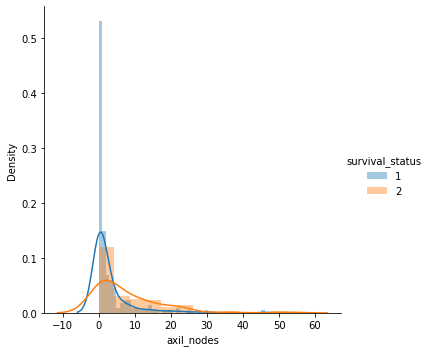

In [5]:
sns.FacetGrid(df,hue="survival_status", size = 5)\
   .map(sns.distplot,"axil_nodes")\
   .add_legend()
plt.show()

### Observation from the plot - axil_nodes as independent variable:
<b> On y-axis: It shows the survival of the patients and on x-axis,it shows the number of axil nodes: If there are more number of nodes then the survival is less. </b>
1. No. of axil_nodes < 3(approx) : The survival of patients are more, like there are more percent chance of survival.✅
2. No. of axil_nodes > 3(approx) : The survival of patients is less, like there is less chance of survival.✅
3. We can see that the axil_nodes is quite a good feature to see whether the patients will survive or not.✅
4. We cannot compute the chances or probability of people who survived will less than 3 axil nodes and vice versa.❌
5. We will use CDF to compute the probabiliy further.✅
6. The PDF of our plot is right skewed that means more number of patients are on the lest side of our plot.


### B) Univariate analysis using operation_Year as independent variable and survival_status as independent variable .

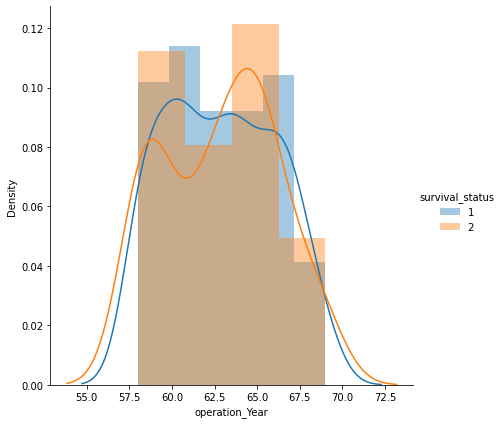

In [6]:
sns.FacetGrid(df,hue="survival_status", size = 6)\
   .map(sns.distplot,"operation_Year")\
   .add_legend()
plt.show()

### Oberservation: taking operation_Year as independent variable :
1. The plot is messed up and we cannot know whether the time taken to do the cancer operation is anywhere related to the chance of survival.❌
2. If we take this feature for our univariate analysis then it is very difficult know the survival chance. hence rejecting this feature.❌

### C) Univariate analysis using age as independent variable and survival_status as independent variable .

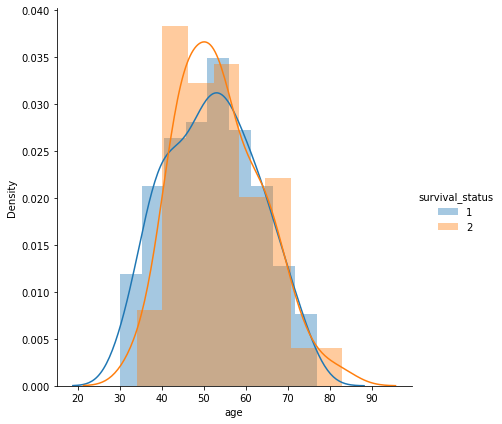

In [7]:
sns.FacetGrid(df,hue="survival_status", size = 6)\
   .map(sns.distplot,"age")\
   .add_legend()
plt.show()

### Oberservation: taking age as independent variable :
1. The plot is again messed up and it cannot give the useful insight from median, standard deviation etc...❌
2. Due to less clearity, we are rejecting this feature and will not cumpute our statistics on this feature.❌

### Q: Which feature is best for our further univariate analysis to know whether the patients survived or not?
    a) axil_nodes
    b) operation_year
    c) age 
Ans: a) <b>axil nodes✅</b> is the best feature as from the above PDF plot we can draw out the conclusions of the survival chance as compare to others.

# 1.4

###  Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots:

<h3>2D scatter plot:</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

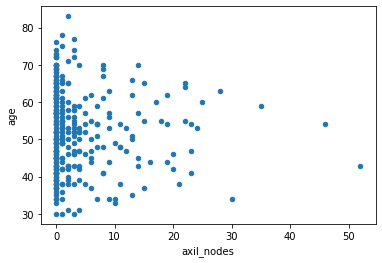

In [8]:
df.plot(kind="scatter",x="axil_nodes",y="age")
plt.show

### Obervations from above 2d scatter plot:
* <b>On the x axis, there are axil_nodes datapoints and on y axis,the age datapoints are there. We cannot distinguish which datapoints are of which labels.</b>
* <b>Oberservation and Disadvantages of the above plots:</b>
1. We cannot tell which datapoints are of which label.❌
2. Origin is not always zero as we can see from the graph.✅
3. Overlapping datapoints.❌
4. We can draw some conclusion that most of our datapoints are between 0 to 20 on x axis.✅
5. <b>Modification</b>: We will try to update this existing code to make the visualization more appealing.✅

<h3>Modified 2-D scatter plot:</h3>

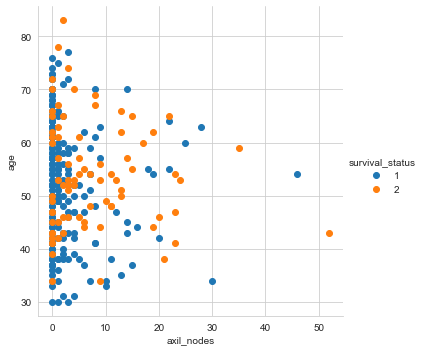

In [9]:
sns.set_style("whitegrid") #it forms the grib like structure at the back
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(plt.scatter, "axil_nodes", "age") \
   .add_legend()
plt.show()


### Observations:
1. <b>Blue points</b> : Represents the points or patients who survived more than 5 years.✅
2. <b>Orange points</b> : Represents the points or patients who survived less than 5 years.✅
3. <b>Grid structure</b> : There is a box like structure in the base of the plot which help us to know where datapoints lie.✅
4. <b>Legend</b> : The plot also have legend which was absent in the previous plot which gives us more clearity what points are about.✅
5. <b>Critical observation</b> : There are more number of blue points comparing it to the orange points.✅

### Disadvantages of this plot related to points:

1. <b>Overlapping of points:</b> We cannot say why more number of patients surviving more than 5 years and that is very important to know which factors are resposnsible for survival to do our EDA.❌
2. <b>Non-Seperable:</b> We cannot seperate our datapoints with a regression line and draw conclusions.❌
3. <b>Modification:</b> : We will try to use pairplot to know the relationship of datapoints much better.✅

<h3>Pair plot:</h3>

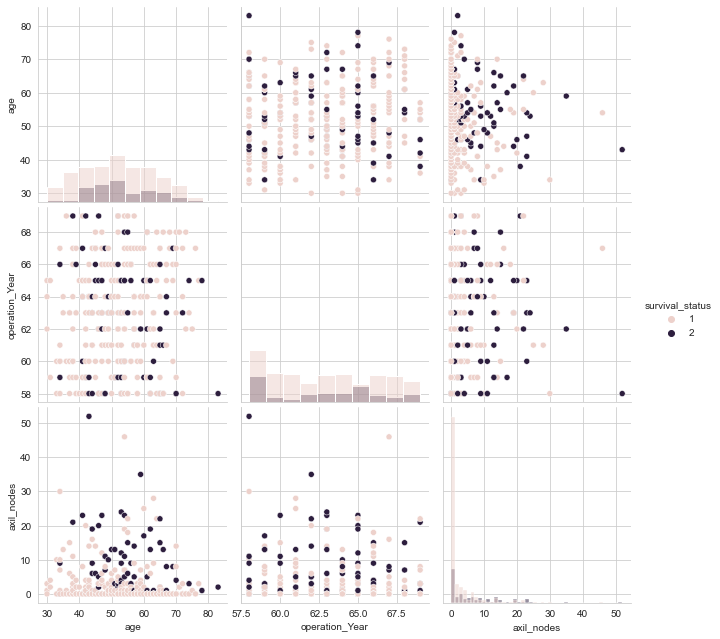

In [10]:

plt.close()
sns.set_style("whitegrid")
sns.pairplot(df, hue="survival_status",size=3, vars=["age","operation_Year","axil_nodes"],diag_kind="hist")
plt.show()


### Obervation from the pairplot:
1. Plot 1, Plot 5, Plot 9: It is the histogram of which explain you the density of data,it is of less useful as it is the plot against the same feature so we will consider other plots.❌
2. Best plot: Plot 3 is the best plot out of other plots and plot 7 is the reverse of plot 3 as axis is changed.✅
3. Other plots: Other plots do not give us much better information as the points are on overlapping plus they are making a uniform kind of structure from which drawing conclusion is difficult.❌

### Conclusion:
1. We will choose Plot 3 for our further analysis as it gives us the more understanding of our data compared to other plots.✅
2. We cannot visualize our data in 3-D from the above Plot 3.❌
3. Now from the pair plot we got to know that plot 3 is a good option to do our analysis further so we will do the univariate analysis on the feature "axil_nodes" and will draw our conclusions.✅

# 1.5

### Performing the deep univariate analysis such as PDF,CDF,mean,boxplot,violin plots and contour plots

#### PDF:To know how many axil nodes is related to the survival.
#### CDF:To know the probability of the survival related to the no. of axil nodes.

#### Creating a dataframe for the patients who survived more than five years and the patients who survived less than 5 years.
* We will analyse them individually and will see how the no. of axil_nodes are affecting the survival rate.
* We will analyse the PDF and CDF of patients who survived more than 5 years and of patients who survived less than 5 years individually.

In [11]:
survived_more_than_5=df.survival_status==1 #variable for patients survived more than 5 years.
survived_less_than_5=df.survival_status==2 #variable for patients survived less than 5 years.

### * Plotting the PDF and CDF of the patients survived more than 5 years.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


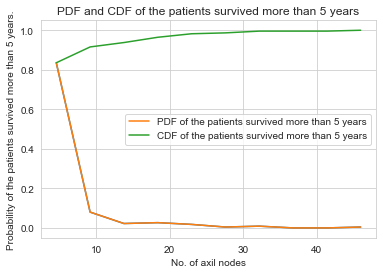

In [12]:
counts, bin_edges = np.histogram(df[survived_more_than_5].axil_nodes, bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.xlabel("No. of axil nodes")
plt.ylabel("Probability of the patients survived more than 5 years.")
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of the patients survived more than 5 years")
plt.plot(bin_edges[1:],cdf,label="CDF of the patients survived more than 5 years")
plt.title("PDF and CDF of the patients survived more than 5 years")
plt.legend()

### Observation from the above plot:
<B>* The green line represents CDF and orange line represents the PDF.
1. When the no. of axil_nodes are less than 5(approx), then there are 85% patients who have less than 5 axil_nodes.
2. As the majority of the patients(225 patients) survived in the study which shows that 285 patients and majority of them have less than 5 axil_nodes.

### * Plotting the PDF and CDF of the patients survived less than 5 years.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


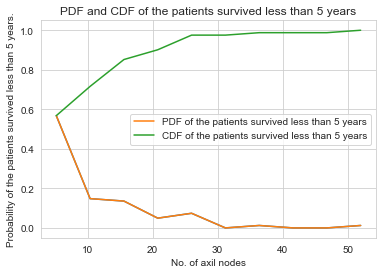

In [13]:
counts, bin_edges = np.histogram(df[survived_less_than_5].axil_nodes, bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
plt.plot(bin_edges[1:],pdf)
plt.xlabel("No. of axil nodes")
plt.ylabel("Probability of the patients survived less than 5 years.")
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF of the patients survived less than 5 years")
plt.plot(bin_edges[1:],cdf,label="CDF of the patients survived less than 5 years")
plt.title("PDF and CDF of the patients survived less than 5 years")
plt.legend()

### Observation:
<b>* The green line represents CDF and orange line represents the PDF.
1. The given plot is of the patients who survived less than five years (81 patients).
2. The CDF tells us that the patients who survived less than 5 years and  about 60%(aprrox) of the patients who survived less than 5 years have more than 3 axil_nodes.


###  Mean, Variance and Std-dev:

* Counting the <b>average(mean) number</b> of axil_nodes of the patients who <b>survived more than 5 years.</b>
* Counting the <b>average(mean) number</b> of axil_nodes of the patients who <b>survived less than 5 years.</b>

In [14]:
print(np.mean(df[survived_more_than_5].axil_nodes))# mean of patients survived_more_than_5
print(np.mean(df[survived_less_than_5].axil_nodes))# mean of patients survived_less_than_5

2.7911111111111113
7.45679012345679


<b>Conclusion from mean:</b>The mean of axil_nodes of patients who survived more than 5 years is <b>2.79 (less than 3)</b> and those hwo survived less than 5 years is <b>7.45 (more than 3)</b>. Therefore, we can say that more axil_nodes means less survival chance.


* Counting the <b>standard deviation</b> of axil_nodes of the patients who <b>survived more than 5 years.</b>
* Counting the <b>standard deviation</b> of axil_nodes of the patients who <b>survived less than 5 years.</b>

In [15]:
print(np.std(df[survived_more_than_5].axil_nodes))
print(np.std(df[survived_less_than_5].axil_nodes))

5.857258449412138
9.128776076761635


<b>Conclusion from standard devation:</b>
* The standard deviation from mean of the patients who survived more than 5 years is 5.85 and those who survived less than 5 years have 9.12.
* Now we can see there is lot of spread when we calculating the distance from so to get more clearity we will work on median.

### Median, Percentile, Quantile, IQR, MAD:

* Counting the <b>median</b> of the patients who <b>survived more than 5 years</b>.
* Counting the <b>median</b> of the patients who <b>survived less than 5 years</b>.

In [16]:
print("The median value of axil_ndoes of the patients survived more than 5 years is : ",np.median(df[survived_more_than_5].axil_nodes))
print("The median value of axil_ndoes of the patients survived more less 5 years is : ",np.median(df[survived_less_than_5].axil_nodes))

The median value of axil_ndoes of the patients survived more than 5 years is :  0.0
The median value of axil_ndoes of the patients survived more less 5 years is :  4.0


* Counting the <b>90th percentiles</b> of the patients who <b>survived more than 5 years</b>.
* Counting the <b>90th percentiles</b> of the patients who <b>survived less than 5 years.</b>

In [17]:
print("The 90th percentiles of the patients survived more than 5 years : ",np.percentile(df[survived_more_than_5].axil_nodes,90))
print("The 90th percentiles of the patients survived less than 5 years : ",np.percentile(df[survived_less_than_5].axil_nodes,90))

The 90th percentiles of the patients survived more than 5 years :  8.0
The 90th percentiles of the patients survived less than 5 years :  20.0


* Counting the <b>quantiles</b> of the patients who <b>survived more than 5 years</b>.
* Counting the <b>quantiles</b> of the patients who <b>survived less than 5 years.</b>

In [18]:
print("The quantiles of the patients survived more than 5 years : ",np.percentile(df[survived_more_than_5].axil_nodes,np.arange(0, 100, 25)))
print("The quantiles of the patients survived less than 5 years : ",np.percentile(df[survived_less_than_5].axil_nodes,np.arange(0, 100, 25)))

The quantiles of the patients survived more than 5 years :  [0. 0. 0. 3.]
The quantiles of the patients survived less than 5 years :  [ 0.  1.  4. 11.]


* Counting the <b>IQR (75th percentile - 25th percentile)</b> of the patients who <b>survived more than 5 years</b>.
* Counting the <b>IQR (75th percentile - 25th percentile)</b> of the patients who <b>survived less than 5 years.</b>

In [19]:
# For the patients who survived more than 5 years:
percentile_75th_more_than5 = np.percentile(df[survived_more_than_5].axil_nodes,75)
percentile_25th_more_than5=np.percentile(df[survived_more_than_5].axil_nodes,25)
print("The IQR of the patients who survived more than 5 years is",
      percentile_75th_more_than5 - percentile_25th_more_than5)

# For the patients who survived less than 5 years:
percentile_75th_less_than5 = np.percentile(df[survived_less_than_5].axil_nodes,75)
percentile_25th_less_than5=np.percentile(df[survived_less_than_5].axil_nodes,25)
print("The IQR of the patients who survived less than 5 years is",
      percentile_75th_less_than5 - percentile_25th_less_than5)

The IQR of the patients who survived more than 5 years is 3.0
The IQR of the patients who survived less than 5 years is 10.0


* Counting the <b>Mean absolute deviation(MAD)</b> of the patients who <b>survived more than 5 years</b>.
* Counting the <b>Mean absolute deviation(MAD)</b> of the patients who <b>survived less than 5 years.</b>

In [20]:
from statsmodels import robust # importing the module to calculate MAD
print("The MAD for the patients who survived more than 5 years is ",robust.mad(df[survived_more_than_5].axil_nodes))
print("The MAD for the patients who survived less than 5 years is ",robust.mad(df[survived_less_than_5].axil_nodes))

The MAD for the patients who survived more than 5 years is  0.0
The MAD for the patients who survived less than 5 years is  5.930408874022408


### Conclusion:
* From the Median, Percentile, Quantile, IQR, MAD. We can say that the patients who survived less than 5 years have high numbers of axil_nodes compared to the patients who survived more than 5 years.
* In a nutshell we can say that patients who have less than 3 axil_nodes survived more.

### Box plot and Whiskers:

<AxesSubplot:xlabel='survival_status', ylabel='axil_nodes'>

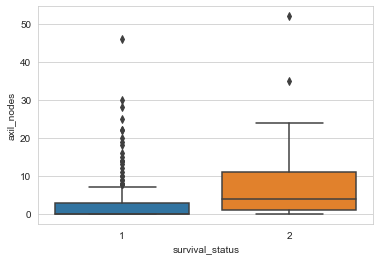

In [21]:
sns.boxplot(x = "survival_status", y = "axil_nodes", data = df)

#### Observation from boxplot:
* The blue boxplot represent the patients who survived more than 5 years and orange boxplot represent the patients who less than 5 years.
* The lower part of the boxplot reprsents 25th quartile and upper part represents 75th percentiles and middle part reprrsents the median.
* We can that range of the patients who survived more than 5 years have axil_nodes less than 3.
* The orange boxplot have the range of 10(approx) and we can see that more no. of patients who surived less than 5 years have more no. of axil_nodes.

#### Benefits from this plot:
* In a single graph we can easily get the idea of IQR,Median,25th Percentile,75th Percentile of the axil_nodes and even the outliers in our data.

### Violin plots:

<AxesSubplot:xlabel='survival_status', ylabel='axil_nodes'>

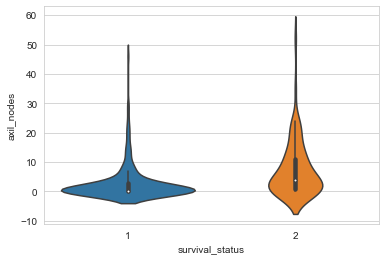

In [22]:
sns.violinplot(x = "survival_status", y = "axil_nodes", data = df, size = 10)

#### Observation from the violin plot:
* The violin plot have a boxplot structure inside the violin shaped graph and the observation from boxplot is already done.
* The curve structure on the side of violin plots are the PDF.
* PDF-1(patients who survived more than 5 years): We can see that the curve is more densed below 3 axil_nodes.
* PDF-2(patients who survived less than 5 years): We can see that the curve less densed compared to PDF-1 and there are more no. of axil_nodes in these patients.

### Contour plot:

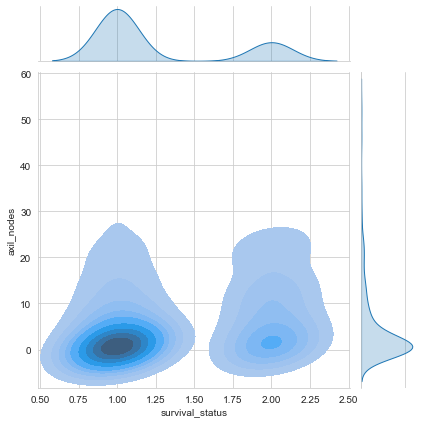

In [23]:
sns.jointplot(x = "survival_status", y = "axil_nodes", data = df ,kind = "kde",fill = True)
plt.grid()
plt.show()

### Observation from Contour Plot:
* The plot 1 is more densed and plot 2 is less densed in respect to the axil_nodes. 


# Overall Conclusions from our EDA:

### 1. From our univariate analysis:


* Our univariate analysis includes the plotting of histogram which includes the PDF. We analyzed each feature(independent variable) with our survival column and found out that The axillary nodes (feature) is giving us the best result compared to the other features. The other features were messed up and we were not able to distinguish between the patients who survived more and less than 5 years.


### 2. Bivariate analysis:


<b>After performing the univariate analysis, we got to know that Axillary nodes is the best.</b><BR>
    
<b>2-D scatter plot:</b>
1. 2-D scatter plot(we plotted axil_nodes against survival_status): From this plot we got to know that majority of the patients lie between the range of 0 to 10 because out of 306 patients 225 survived more than 5 years and we know that the less number of axillary nodes is responsible for the longer survival and therefore most patients lie between 0 to 10 range axillary nodes.
2. Some points are above 10 axillary nodes and these points are mostly orange which are of the patients who survived less than 5 years.<br>
    
<b>Pair plot:
* From the pair plot we got to know the relationship between each and every feature of our dataset and it gives us the bigger picture as whole. Out of these 9 plots, the plot 3 and plot 7 are the best one but again they are the same cause their axis has been shifted so we took plot 3 for our deeper analysis.


### 3. From PDF and CDF:
* The PDF of the patients who survived more than 5 years tells us that the majority of patients about ie. 70% to 80% percent have 0 to 5 axillary nodes and their CDF shows that the survival of the patients who have 0 to 3 axillary nodes have very chance of survival more than 5 years.
* The PDF and CDF of the patients who survived less than five years tell us that the majority of patients have axillary nodes more than 3.


### 4. From BOXPLOT:
* For the patients survived more than 5 years: Roughly the 25th percentile is 0 , median is 0 and 75th percentile is 3.
* For the patients survived less than 5 years: Roughly   the 25th percentile is 1, median is 4 and 75th percentile is 11.


### 5. From the VIOLIN PLOT:
* PDF-1(patients who survived more than 5 years): We can see that the curve is more dense below 3 axil_nodes.
* PDF-2(patients who survived less than 5 years): We can see that the curve less dense compared to PDF-1 and there are more no. of axil_nodes in these patients.


### 6. The Mean and Median of axil_nodes:
* The mean and median of the patients who survived more than 5 years is about 2.78 and 0 and the mean and median of the patients who survived less than 5 years has 7.45 and 4. 


# Observations from our EDA:

* The patients who survived more than 5 years has a smaller number of axillary nodes ranging from 0 to 3 whereas patients who survived less than 5 years years have high number of axillary nodes which is ranging from 3 to 11.
* The patients who have fewer axillary nodes have more chances of survival compare and less axillary nodes shows that 80% chance of the survival of the patients to patients who have a greater number of axillary nodes. The patient who survived less than 5 years , in them more number of axillary nodes resulted in 60% to 70% patients death.


# 1.5

###  Summary of our EDA:

<b>✔ Keypoint 1 :</b> The most important feature is axil_nodes in defining whether the patients survived for longer duration or not. Other features such as age and operation year are not as much as important compared to axil_nodes.

<b>✔ Keypoint 2 : </b>After analysing that axil_nodes are the deciding factor(majority) for the longer survival for patients, it is important to know the number of axil_nodes should be there.

<b>✔ Keypoint 3 :</b> We observed from our PDF  and CDF that if the axil_nodes are less than 3 then the majority i.e. about 85% of patients had less than 3 axil_nodes(approx) survived more than 5 years whereas if the axil_nodes are more than 3 then about 60% of patients are have more than 3 axil_nodes who survived less than 5 years.

<b>✔ Keypoint 4 :</b> 225 patients who survived have the average number of axil_nodes is 2.789 nodes which is less than 3. The 81 patients who survivd less than 5 years have the average axil_nodes is 7.45 which is above 3 making less survival chance.

<b>✔ My suggestion :</b> If we try to make machine learning model then my advise would be that we should give more importance to the axil_nodes as it is the deciding factor in the survival of the patients in most of cases.